In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('honey.csv')

In [4]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [5]:
df.isnull().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [9]:
df['state'].unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN',
       'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MS', 'MO', 'MT',
       'NE', 'NV', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA',
       'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'SC'],
      dtype=object)

# Plotting graphs

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


<Axes: >

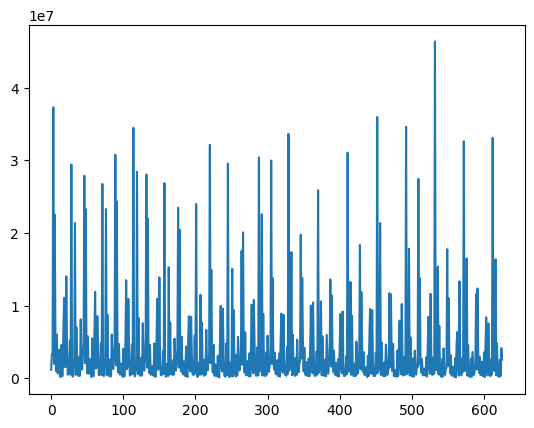

In [8]:
totalprod_count = df['totalprod'] 
totalprod_count.plot()

In [17]:
top_10_states = df.sort_values(by='totalprod', ascending=False).head(10)
top_10_states['state']

532    ND
3      CA
452    ND
492    ND
114    ND
329    ND
612    ND
572    ND
220    CA
411    ND
Name: state, dtype: object

## Bar Chart

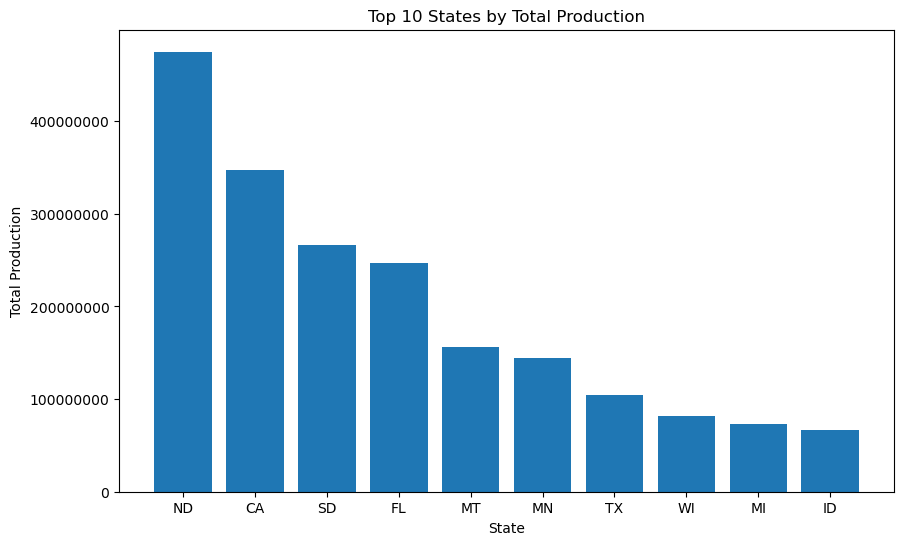

In [22]:
state_total_prod = df.groupby('state')['totalprod'].sum().reset_index()

# Sort by total production and select top 10 states
top_10_states = state_total_prod.sort_values(by='totalprod', ascending=False).head(10)

# Now plot a Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_states['state'], top_10_states['totalprod'])
plt.title('Top 10 States by Total Production')
plt.xlabel('State')
plt.ylabel('Total Production')
# it was shoiwng in scientific notaton so we formattd it (y-axis)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

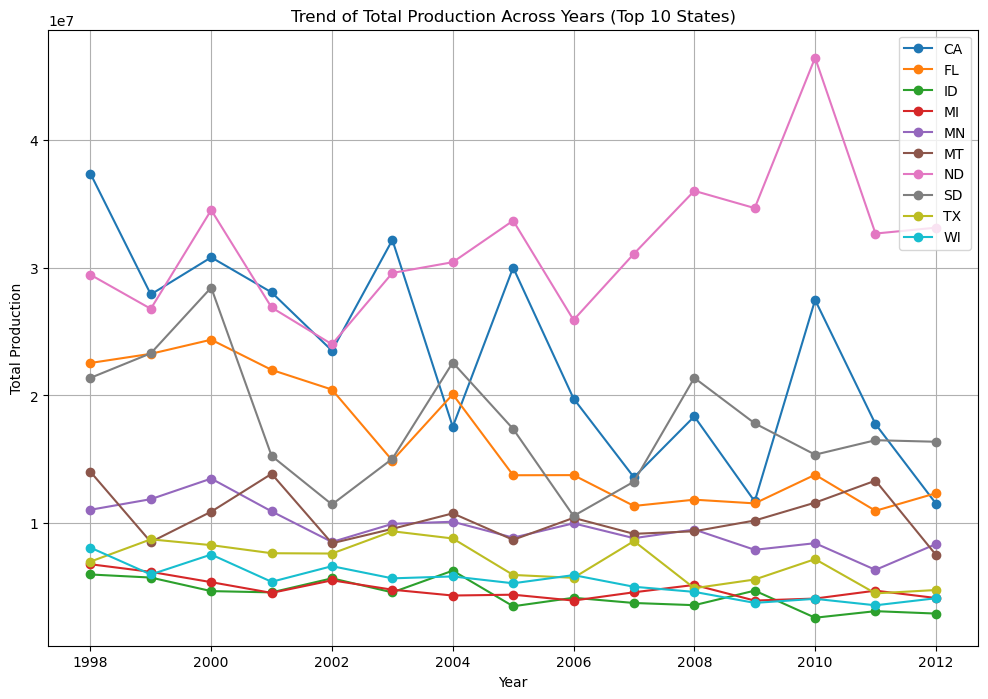

In [24]:
state_total_prod = df.groupby(['state', 'year'])['totalprod'].sum().reset_index()

# Sort by total production and select top 10 states
top_10_states = state_total_prod.groupby('state').sum().sort_values(by='totalprod', ascending=False).head(10).index

# Filter the data to include only the top 10 states
top_10_states_data = state_total_prod[state_total_prod['state'].isin(top_10_states)]

# Plot a line graph to show the trend of total production across years
plt.figure(figsize=(12, 8))
for state in top_10_states_data['state'].unique():
    plt.plot(top_10_states_data[top_10_states_data['state'] == state]['year'],
             top_10_states_data[top_10_states_data['state'] == state]['totalprod'],
             marker='o', label=state)

plt.title('Trend of Total Production Across Years (Top 10 States)')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.legend()
plt.grid(True)
plt.show()

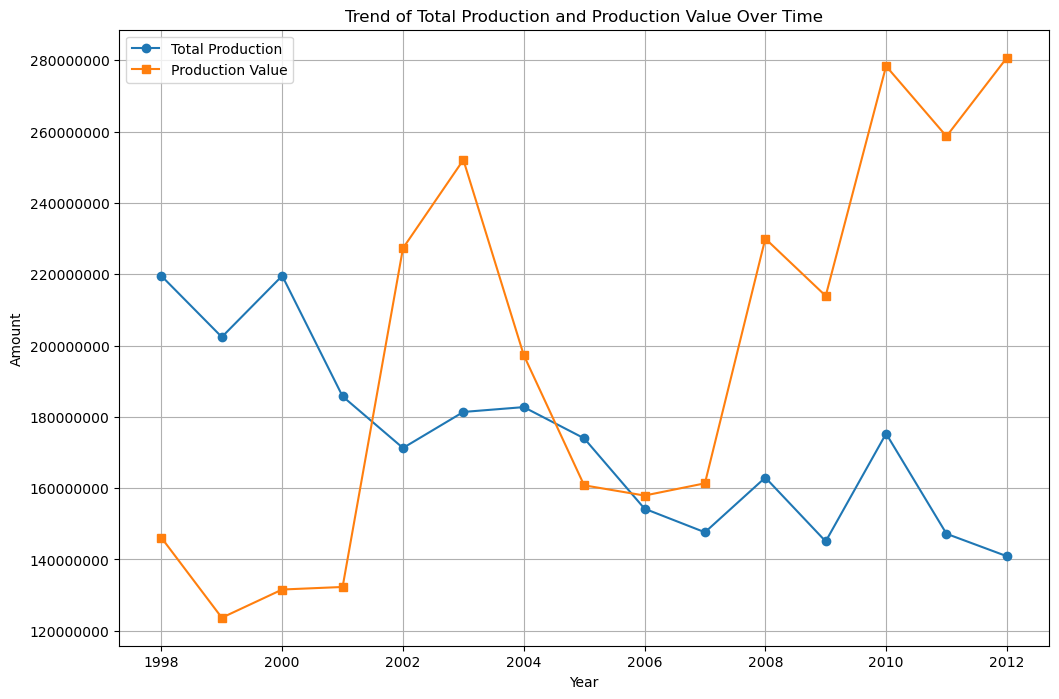

In [26]:
yearly_totals = df.groupby('year').sum().reset_index()

# Plotting the trends
plt.figure(figsize=(12, 8))
plt.plot(yearly_totals['year'], yearly_totals['totalprod'], marker='o', label='Total Production')
plt.plot(yearly_totals['year'], yearly_totals['prodvalue'], marker='s', label='Production Value')

plt.title('Trend of Total Production and Production Value Over Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Heatmap/correlation 

<Figure size 1000x600 with 0 Axes>

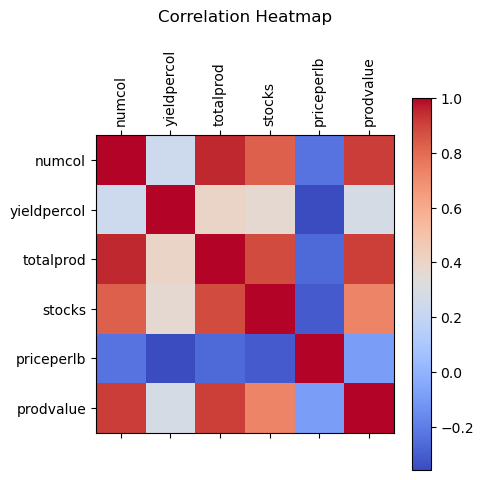

In [23]:
# Heatmap/correlation between all num/float cols
plt.figure(figsize=(10, 6))
corr = df[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']].corr()
cax = plt.matshow(corr, cmap='coolwarm')
plt.colorbar(cax)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Heatmap', pad=20)# pad is the distance adjusted by title from the plot.
plt.show()

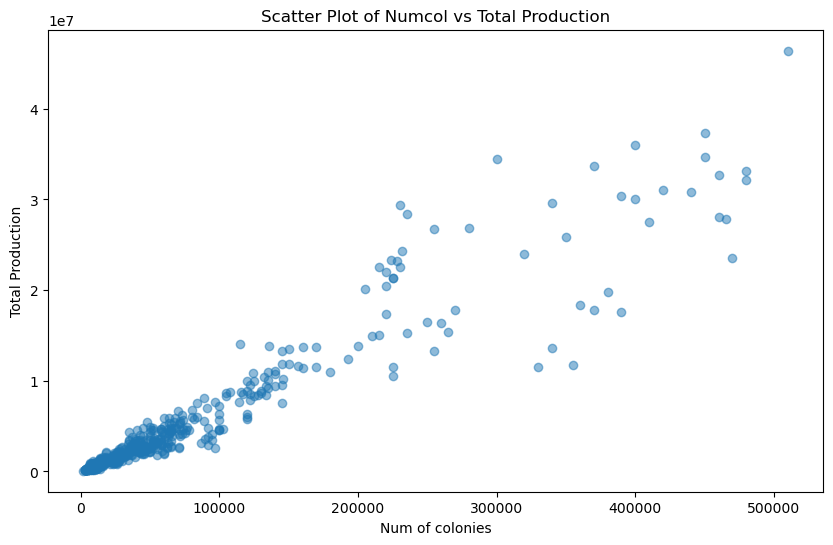

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(df['numcol'], df['totalprod'], alpha=0.5)
plt.title('Scatter Plot of Numcol vs Total Production')
plt.xlabel('Num of colonies')
plt.ylabel('Total Production')
plt.show()


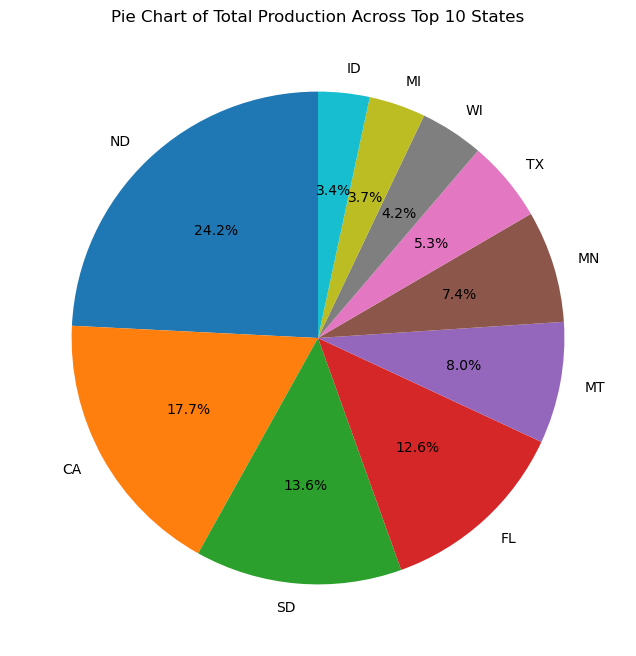

In [38]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_states['totalprod'], labels=top_10_states['state'], autopct='%1.1f%%', startangle=90)#startangle decides on which angle first entry would be
plt.title('Pie Chart of Total Production Across Top 10 States')
plt.show()